In [1]:
#loading modules

import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,Activation
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
print("Training shape: ",X_train.shape)
print("Testing shape: ",X_test.shape)
print("Output training shape: ",y_train.shape)
print("output testing shape: ",y_test.shape)



Training shape:  (50000, 32, 32, 3)
Testing shape:  (10000, 32, 32, 3)
Output training shape:  (50000, 1)
output testing shape:  (10000, 1)


In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

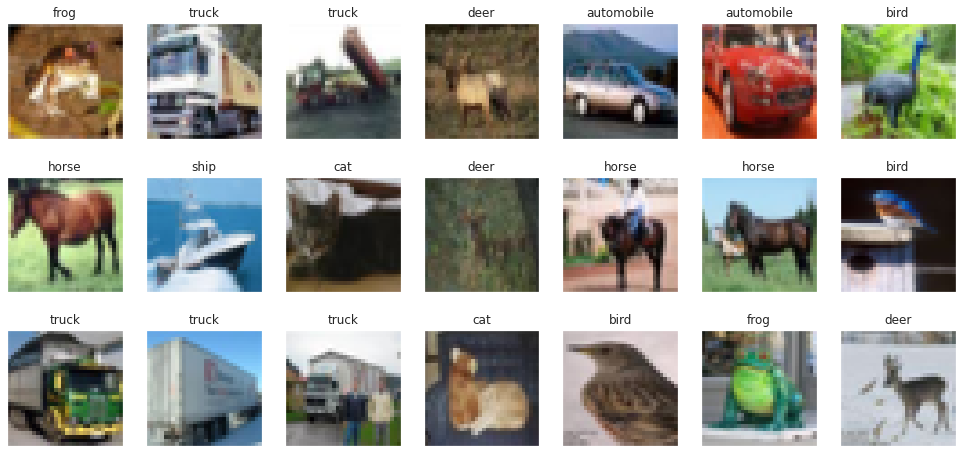

In [5]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [6]:
#Convert to grayscale

X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

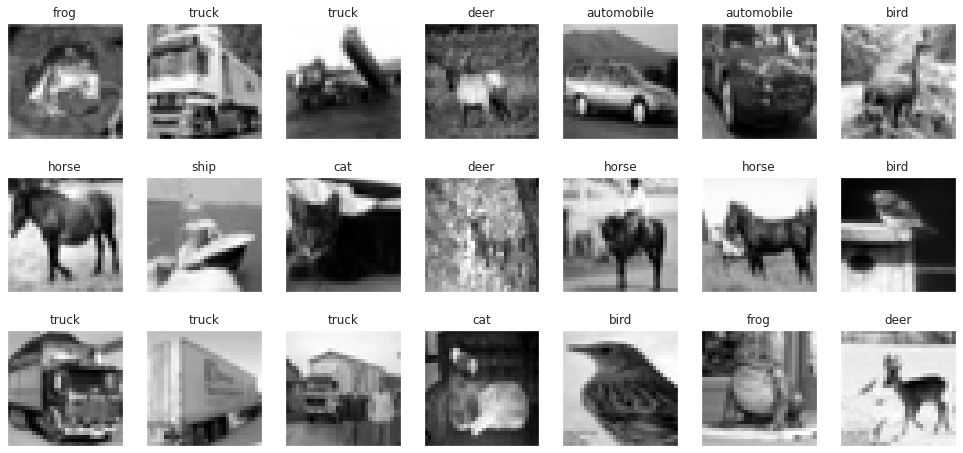

In [7]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [8]:
X_train  = X_train/255
X_test  = X_test/255

In [9]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [10]:
one_hot_encoder.fit(y_train)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [11]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [12]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [13]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [14]:
input_shape

(32, 32, 1)

In [15]:
# Create a model and add layers
model = Sequential()

#1st Convolution layer 

In [16]:
#here input shape is (32,32,1) and output shape is (28,28,6)
#As per the formula output shape is derived as (n-f+1, n-f+1, no. of filters)
# here n refers to input shape i.e n=32
# f refers to filter size which we need to calculate
# no. of filters given in question is 6 
# so 28 = n-f+1 = 32-f+1 = 33-f 
# so f = 33-28 = 5
#so our filter size is (5,5)

model.add(Conv2D(filters = 6, kernel_size = (5,5), activation='relu', strides=(1, 1), input_shape=input_shape))

In [17]:
#checking the output shape as per our given requirements
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


#1st Subsampling Layer

In [18]:
import tensorflow as tf
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None))


In [19]:
#checking the output shape as per our given requirements
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


#2nd Convolution Layer

In [20]:
#here input shape is (14,14,6) and output shape is (10,10,16)
#As per the formula output shape is derived as (n-f+1, n-f+1, no. of filters)
# here n refers to input shape i.e n=14
# f refers to filter size which we need to calculate
# no. of filters given in question is 16 
# so 10 = n-f+1 = 14-f+1 = 15-f 
# so f = 15-10 = 5
#so our filter size is (5,5)

model.add(Conv2D(filters = 16, kernel_size = (5,5), activation='relu', strides=(1, 1), input_shape=input_shape))

In [21]:
#checking the output shape as per our given requirements
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________


#2nd SubSampling Layer

In [22]:
import tensorflow as tf
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None))

In [23]:
#checking the output shape as per our given requirements
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.add(Flatten())

#Fully Connected Layer1

In [25]:
model.add(Dense(120, input_shape=(5,5,16)))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

In [26]:
#checking the output shape as per our given requirements
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dropout (Dropout)            (None, 120)               0

#2nd Fully COnnected Layer

In [27]:
#2nd Fully Connected Layer
model.add(Dense(84))
#Add Dropout
model.add(Dropout(0.4))

In [28]:
#checking the output shape as per our given requirements
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dropout (Dropout)            (None, 120)               0

#Output Layer

In [29]:
#Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [30]:
#checking the output shape as per our given requirements
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dropout (Dropout)            (None, 120)               0

#Compile the Model

In [31]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

In [32]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [33]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.9837 - acc: 0.2660 - val_loss: 1.6782 - val_acc: 0.3997
Epoch 2/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.6696 - acc: 0.4009 - val_loss: 1.5356 - val_acc: 0.4490
Epoch 3/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5544 - acc: 0.4473 - val_loss: 1.4751 - val_acc: 0.4753
Epoch 4/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4879 - acc: 0.4775 - val_loss: 1.4158 - val_acc: 0.5019
Epoch 5/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4181 - acc: 0.5061 - val_loss: 1.3902 - val_acc: 0.5137
Epoch 6/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3748 - acc: 0.5202 - val_loss: 1.3277 - val_acc: 0.5363
Epoch 7/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3450 - acc: 0.5349 - val_loss: 1.2915 - val_acc: 0.5444
Epoch 8/20
1563/1563 [==========================

In [34]:
model.save('CNN_CIFAR.h5')

In [35]:
model = load_model('CNN_CIFAR.h5')

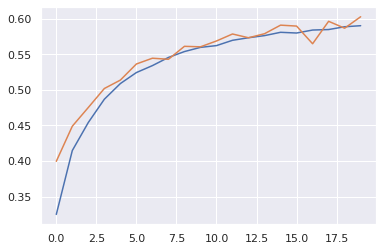

In [36]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

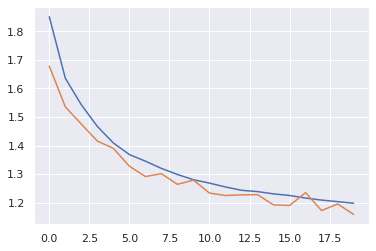

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [38]:
predictions = model.predict(X_test)

In [39]:
predictions = one_hot_encoder.inverse_transform(predictions)

In [40]:
y_test = one_hot_encoder.inverse_transform(y_test)

In [41]:
cm = confusion_matrix(y_test, predictions)

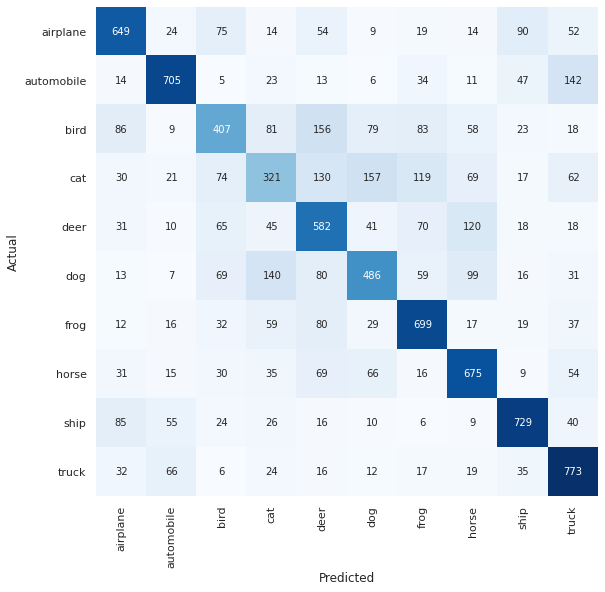

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [44]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

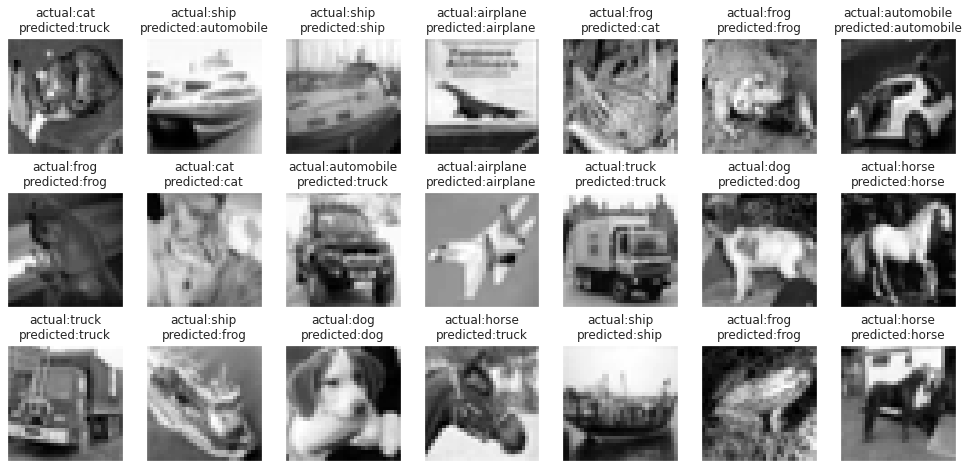

In [45]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' 
                            + 'predicted:' + labels[predictions[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()
